In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
data = pd.read_csv('FOOD-DATA-GROUP1.csv')

In [3]:
print(data.head())

   Unnamed: 0.1  Unnamed: 0                              food  Caloric Value  \
0             0           0                      cream cheese             51   
1             1           1                 neufchatel cheese            215   
2             2           2  requeijao cremoso light catupiry             49   
3             3           3                    ricotta cheese             30   
4             4           4              cream cheese low fat             30   

    Fat  Saturated Fats  Monounsaturated Fats  Polyunsaturated Fats  \
0   5.0             2.9                   1.3                 0.200   
1  19.4            10.9                   4.9                 0.800   
2   3.6             2.3                   0.9                 0.000   
3   2.0             1.3                   0.5                 0.002   
4   2.3             1.4                   0.6                 0.042   

   Carbohydrates  Sugars  ...  Calcium  Copper   Iron  Magnesium  Manganese  \
0            

In [4]:
print(data.isnull().sum())

Unnamed: 0.1            0
Unnamed: 0              0
food                    0
Caloric Value           0
Fat                     0
Saturated Fats          0
Monounsaturated Fats    0
Polyunsaturated Fats    0
Carbohydrates           0
Sugars                  0
Protein                 0
Dietary Fiber           0
Cholesterol             0
Sodium                  0
Water                   0
Vitamin A               0
Vitamin B1              0
Vitamin B11             0
Vitamin B12             0
Vitamin B2              0
Vitamin B3              0
Vitamin B5              0
Vitamin B6              0
Vitamin C               0
Vitamin D               0
Vitamin E               0
Vitamin K               0
Calcium                 0
Copper                  0
Iron                    0
Magnesium               0
Manganese               0
Phosphorus              0
Potassium               0
Selenium                0
Zinc                    0
Nutrition Density       0
dtype: int64


In [5]:
print(data.describe())

       Unnamed: 0.1  Unnamed: 0  Caloric Value         Fat  Saturated Fats  \
count    551.000000  551.000000     551.000000  551.000000      551.000000   
mean     275.000000  275.000000     237.359347   10.766933        3.722715   
std      159.204271  159.204271     199.235598   12.544196        5.397021   
min        0.000000    0.000000       3.000000    0.000000        0.000000   
25%      137.500000  137.500000      94.500000    2.500000        0.500000   
50%      275.000000  275.000000     186.000000    6.600000        1.800000   
75%      412.500000  412.500000     337.000000   14.400000        4.800000   
max      550.000000  550.000000    1578.000000   87.500000       43.500000   

       Monounsaturated Fats  Polyunsaturated Fats  Carbohydrates      Sugars  \
count            551.000000            551.000000     551.000000  551.000000   
mean               4.001564              2.170793      15.819036    2.708907   
std                5.540608              3.470820      20

In [9]:
X = data[['Fat', 'Protein', 'Carbohydrates']]
y = data['Caloric Value']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
y_pred = model.predict(X_test)

In [14]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [15]:
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 7.005380368144234
Mean Squared Error: 840.8646129572633
Root Mean Squared Error: 28.997665646690653
R-squared: 0.9843819217204031


In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
example_food = pd.DataFrame({
    'Fat': [45],
    'Protein': [0.8],
    'Carbohydrates': [225],
})

In [57]:
example_food_scaled = scaler.transform(example_food)

In [58]:
predicted_calories = model.predict(example_food_scaled)

C:\Users\Sweet Home\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [59]:
print(f'Predicted calories for the example food: {predicted_calories[0]:.2f} calories.')

Predicted calories for the example food: 66.41 calories.


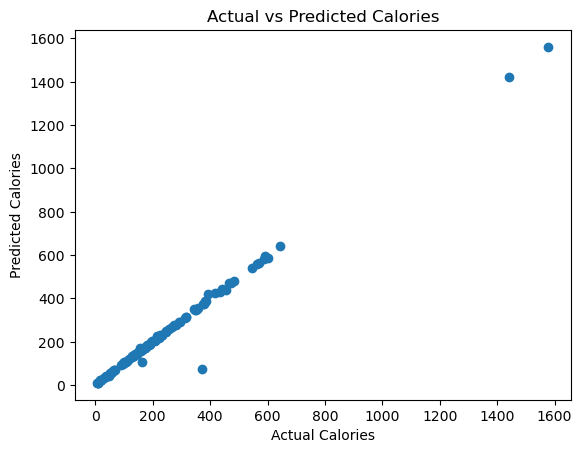

In [51]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.title('Actual vs Predicted Calories')
plt.show()

In [60]:
def predict_calories(Fat, Protein, Carbohydrates):
    input_features = np.array([[Fat, Protein, Carbohydrates]])
    predicted_calories = model.predict(input_features)
    return predicted_calories[0]

Fat = 45
Protein = 0.8
Carbohydrates = 225

predicted_calories = predict_calories(Fat, Protein, Carbohydrates)
print(f'The predicted calories for a food item with {Fat}g fat, {Protein}g protein, and {Carbohydrates}g carbs is {predicted_calories:.2f} calories.')

The predicted calories for a food item with 45g fat, 0.8g protein, and 225g carbs is 1260.30 calories.


C:\Users\Sweet Home\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
